# Objective 1

Training a clasification NN for the alphabet sample data provided through Canvas

### Get Data

In [186]:
import pandas as pd

alphabet_sample_df = pd.read_csv('alphabet-sample-data.csv')

In [187]:
alphabet_sample_df.shape

(26, 82)

In [188]:
alphabet_sample_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x73,x74,x75,x76,x77,x78,x79,x80,x81,letter
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,A
1,1,1,1,1,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,0,B
2,0,1,1,1,1,0,0,0,0,1,...,1,1,1,1,1,0,0,0,0,C
3,1,1,1,1,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,0,D
4,1,1,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,0,E


Looking at the first image in the set:

In [189]:
example_value = alphabet_sample_df.iloc[0,:81].values.astype('float')

In [190]:
example_value = example_value.reshape(9, 9)

In [191]:
print(example_value)

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [192]:
import matplotlib.pyplot as plt

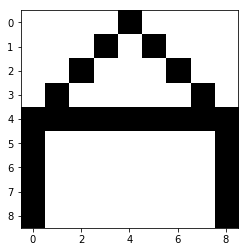

In [195]:
plt.imshow(example_value, cmap=plt.cm.binary)
plt.savefig('Input A.png')
plt.show()

Notes:
- overall goal here is to understand how the network is being trained on different alphabet characters. To do so, the following steps will be taken:
    1. train a NN with one hidden layer on the alphabet_sample_df with no validation set
    2. fit it as well as possible
    3. look at the weights of the network to understand what each node in the hidden layer is doing

### Prep Data

Steps:
1. Convert features to numpy array
2. Convert labels to one-hot numpy array using keras to_categorical

Convert features to numpy array:

In [9]:
X = alphabet_sample_df.iloc[:,:81].values
y = alphabet_sample_df.iloc[:,81].values

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [11]:
y

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

Convert labels to one-hot:

In [12]:
y = pd.get_dummies(y).values

In [13]:
y[0:3]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]], dtype=uint8)

### Train NN

In [283]:
X.shape

(26, 81)

In [294]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(81,)))
model.add(layers.Dense(26, activation='softmax'))

In [295]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [296]:
history = model.fit(X, y, epochs=100, batch_size=1, verbose=0)

Plotting accuracy and loss:

In [297]:
def create_loss_plot(history):
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b', label='Loss')
    plt.title('Network loss by Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

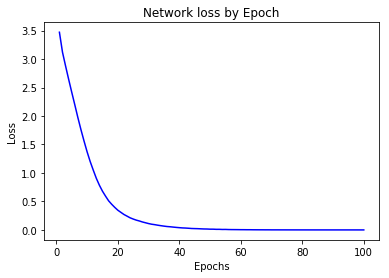

In [298]:
create_loss_plot(history)

Looks like the system stops improving around Epoch 40

In [299]:
def create_acc_plot(history):
    acc = history.history['acc']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b', label='Accuracy')
    plt.title('Network Accuracy by Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

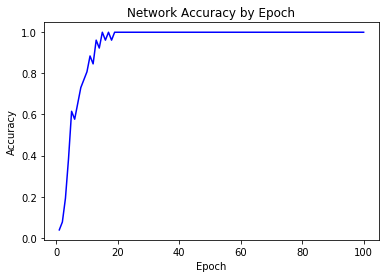

In [300]:
create_acc_plot(history)

New model with 40 epochs:

In [301]:
history = model.fit(X, y, epochs=40, batch_size=1, verbose=0)

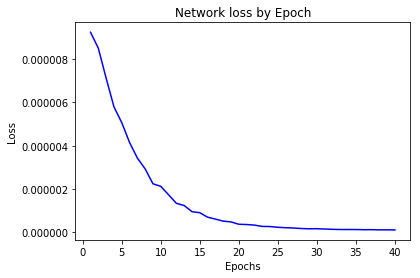

In [302]:
create_loss_plot(history)

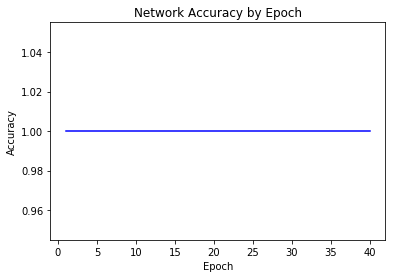

In [303]:
create_acc_plot(history)

Final results:

In [304]:
results = model.evaluate(X, y)

26/26 [==============================] - 0s 8ms/step


In [305]:
results

[1.1920928955078125e-07, 1.0]

100% accuracy!  Overfitted, but since the goal of this exercise is just to train to the input images and not to generalize, I think it's fine

### Evaluate Weights

In [27]:
model.layers

In [28]:
model.layers[0].get_weights()

[array([[-0.00283498,  0.07014187, -0.04240389, ...,  0.34483585,
         -0.08918595,  0.3572666 ],
        [ 0.09132642,  0.11308733,  0.23297644, ...,  0.12259011,
          0.35626012,  0.06168767],
        [-0.09782846, -0.15698652,  0.2210049 , ...,  0.00077113,
          0.20224492,  0.18849969],
        ...,
        [-0.12080251, -0.25211272, -0.19589236, ..., -0.24675772,
          0.09746805, -0.17740533],
        [-0.05846127, -0.28568304, -0.02396998, ...,  0.07650455,
          0.19324438, -0.17610389],
        [-0.46059704,  0.05837941,  0.11371532, ..., -0.00763573,
          0.22826071, -0.11059642]], dtype=float32),
 array([-0.02404919,  0.11874797,  0.11984563, -0.01007631,  0.03583613,
         0.12870146,  0.10943932,  0.09239361, -0.02463863,  0.10073957,
         0.02885842,  0.16218248,  0.05769909,  0.07700149, -0.00626337,
         0.14818898,  0.04298806,  0.06559849,  0.04810087,  0.03000247,
         0.07805565,  0.06059983, -0.00528629,  0.1053288 ,  0.010

In [29]:
print(len(model.layers[0].get_weights()))
print(len(model.layers[1].get_weights()))

2
2


In [30]:
print(len(model.layers[0].get_weights()[0]))
print(len(model.layers[1].get_weights()[0]))
print(len(model.layers[0].get_weights()[1]))
print(len(model.layers[1].get_weights()[1]))

81
100
100
26


In [31]:
model.layers[1].get_weights()[1]

array([-0.16419022, -0.23346797, -0.1596221 , -0.17322573, -0.22415146,
       -0.13118657, -0.15882778, -0.18682003, -0.20189723, -0.17613325,
       -0.03995102, -0.12371186, -0.20969437, -0.15860839, -0.14012596,
       -0.11617879, -0.19147114, -0.14192195, -0.10606078, -0.03168732,
       -0.21549971, -0.08828148, -0.11544703, -0.1175394 , -0.0785026 ,
       -0.17750522], dtype=float32)

In [32]:
print(len(model.layers[0].get_weights()[0][0]))
print(len(model.layers[0].get_weights()[0][9]))
print(len(model.layers[1].get_weights()[0][0]))
print(len(model.layers[1].get_weights()[0][1]))
# print(len(model.layers[0].get_weights()[1][0]))
# print(len(model.layers[0].get_weights()[1][1]))
# print(len(model.layers[1].get_weights()[1][0]))
# print(len(model.layers[1].get_weights()[1][1]))

100
100
26
26


In [33]:
print(model.layers[0].get_weights()[0][0])
print(model.layers[1].get_weights()[0][0])

[-0.00283498  0.07014187 -0.04240389 -0.00983398  0.13222913  0.18216796
  0.04266698 -0.12268642 -0.16942437  0.02611219  0.08438761  0.38013285
  0.01328014  0.18558908 -0.04246602  0.33271155  0.39125326  0.23295794
 -0.0594237  -0.07443823 -0.4799281  -0.01726549 -0.22071359 -0.17715804
 -0.05948135 -0.2645322   0.26628616  0.10643417 -0.08423773 -0.48704204
 -0.15604901  0.21286106  0.05425497  0.31206626  0.29840916 -0.4429682
  0.1339303  -0.16110308  0.09772993  0.09957097  0.12573123 -0.1449665
  0.10757857  0.19197868  0.4087839   0.272441   -0.09246861  0.0652281
  0.00830305  0.30346674  0.08364119 -0.09409613  0.42763218  0.08643568
  0.21321309  0.1016328   0.09003549 -0.07420971  0.35093373  0.36552635
 -0.14063641  0.31063297  0.24368955  0.02586647 -0.11540696  0.25532103
 -0.09411471  0.03223759 -0.07682896 -0.07378364 -0.2746552   0.27318192
 -0.14581974  0.09975201  0.49601755  0.26400778  0.05095874 -0.0311318
 -0.0467139   0.29848164 -0.07336681  0.11300401 -0.060

Notes:
- 2 different levels in model.layers(), one for each layer
- each layer has a weights matrix and biases array within it

In [34]:
%%html
<img src="weights.jpg">

Notes:
- now that I have a basic understanding of how the get_weights() function works, I'm going to use it to generate an image of a neuron's representation of an input image

In [35]:
model.layers[0].get_weights()[0]

array([[-0.00283498,  0.07014187, -0.04240389, ...,  0.34483585,
        -0.08918595,  0.3572666 ],
       [ 0.09132642,  0.11308733,  0.23297644, ...,  0.12259011,
         0.35626012,  0.06168767],
       [-0.09782846, -0.15698652,  0.2210049 , ...,  0.00077113,
         0.20224492,  0.18849969],
       ...,
       [-0.12080251, -0.25211272, -0.19589236, ..., -0.24675772,
         0.09746805, -0.17740533],
       [-0.05846127, -0.28568304, -0.02396998, ...,  0.07650455,
         0.19324438, -0.17610389],
       [-0.46059704,  0.05837941,  0.11371532, ..., -0.00763573,
         0.22826071, -0.11059642]], dtype=float32)

above represents 81 arrays of size 100.  each array represents an input weight from a cell in the original image, each value in the array represents one of the nodes in the hidden layer

Steps:
1. take the first value from each array in above
2. reshape to 9x9
3. view resulting image

In [209]:
import numpy as np

def create_weight_image(model, layer, node, fname='', savefig=False):
    layer_weights = model.layers[layer].get_weights()[0]
    
    input_weights = []
    for weight in range(len(layer_weights)):
        input_weights.append(layer_weights[weight][node])
    
    print('Number of Weights =', len(input_weights))
    
    input_weights = np.array(input_weights).astype('float').reshape(9, 9)
    plt.imshow(input_weights, cmap=plt.cm.binary)
    if savefig:
        plt.savefig(fname)
    plt.show

Number of Weights = 81


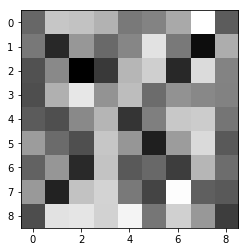

In [347]:
create_weight_image(model, layer=0, node=42)

Number of Weights = 81


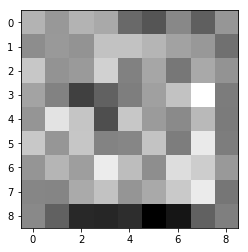

In [348]:
create_weight_image(model, layer=0, node=38, 
                    fname='100_hidden_39.png', savefig=True)

# Network with no hidden layer

Build network:

In [199]:
model = models.Sequential()
model.add(layers.Dense(26, activation='softmax', input_shape=(81,)))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=200, batch_size=1, verbose=0)

Evaluate network performance:

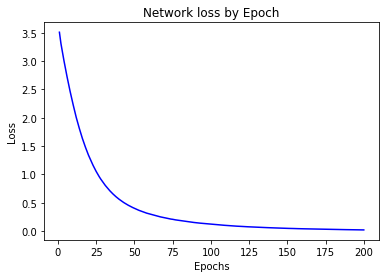

In [200]:
create_loss_plot(history)

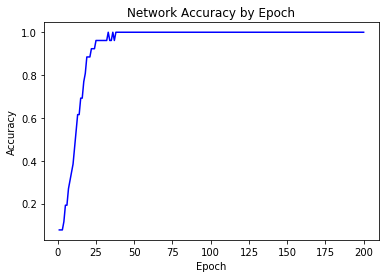

In [201]:
create_acc_plot(history)

In [202]:
results = model.evaluate(X, y)
results

26/26 [==============================] - 0s 6ms/step


[0.021520601585507393, 1.0]

View weight images:

Number of Weights = 81


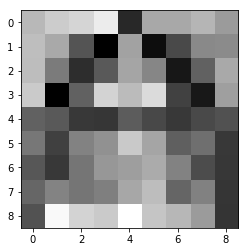

In [203]:
# A
create_weight_image(model, layer=0, node=0, 
                    fname='no_hidden_A.png', savefig=True)

Number of Weights = 81


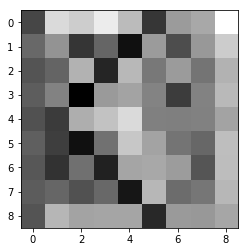

In [123]:
# K
create_weight_image(model, layer=0, node=10)

Number of Weights = 81


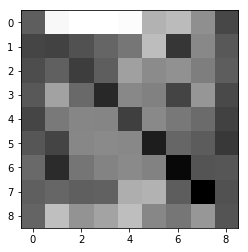

In [124]:
# N
create_weight_image(model, layer=0, node=13)

Number of Weights = 81


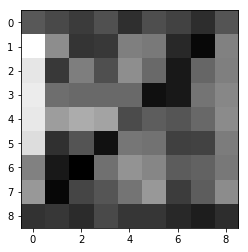

In [125]:
# Z
create_weight_image(model, layer=0, node=25)

# Network with hidden layer of 10

Build network:

In [204]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(81,)))
model.add(layers.Dense(26, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=250, batch_size=1, verbose=0)

Evaluate network:

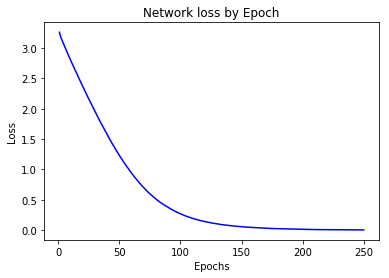

In [205]:
create_loss_plot(history)

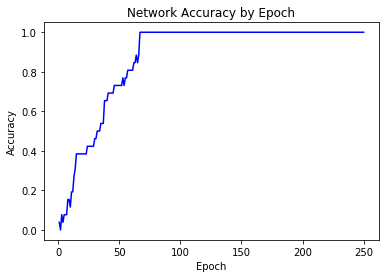

In [206]:
create_acc_plot(history)

In [207]:
results = model.evaluate(X, y)
results

26/26 [==============================] - 0s 7ms/step


[0.001385816023685038, 1.0]

View weight images:

Number of Weights = 81


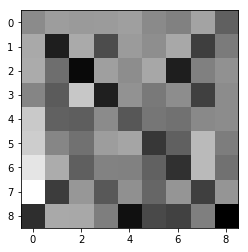

In [223]:
create_weight_image(model, layer=0, node=9,
                    fname='10_hidden_10.png', savefig=True)

Number of Weights = 81


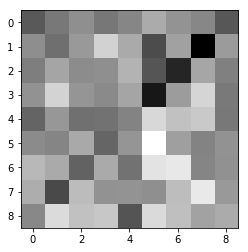

In [224]:
create_weight_image(model, layer=0, node=4)

# Network with hidden layer of 50

In [225]:
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(81,)))
model.add(layers.Dense(26, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=100, batch_size=1, verbose=0)

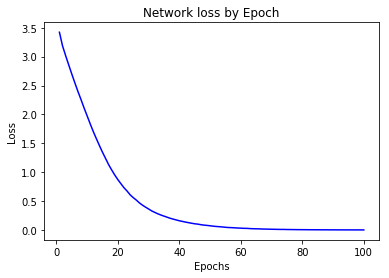

In [226]:
create_loss_plot(history)

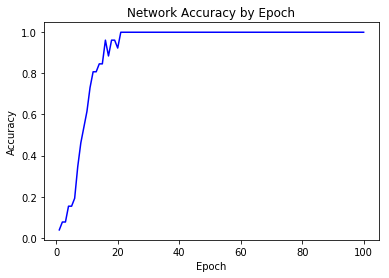

In [227]:
create_acc_plot(history)

In [228]:
results = model.evaluate(X, y)
results

26/26 [==============================] - 0s 7ms/step


[0.00039589806692674756, 1.0]

View weight images:

Number of Weights = 81


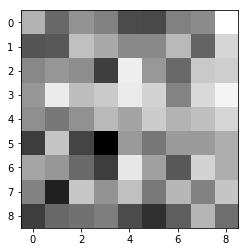

In [229]:
create_weight_image(model, layer=0, node=13)

Number of Weights = 81


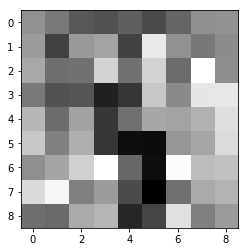

In [282]:
create_weight_image(model, layer=0, node=16, 
                    fname='50_hidden_17.png', savefig=True)